Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved BSD-3 license. (c) Lorena A. Barba, Gilbert F. Forsyth 2017. Thanks to NSF for support via CAREER award #1149784.
<a href="https://twitter.com/LorenaABarba">@LorenaABarba</a>

<h1>12 steps to Navier–Stokes</h1>
You see where this is going ... we'll do 2D diffusion now and next we will combine steps 6 and 7 to solve Burgers' equation. So make sure your previous steps work well before continuing.

<h2>Step 7: 2D Diffusion</h2>
And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$
You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion. We are going to use the same scheme here, with our forward difference in time and two second-order derivatives.

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$
Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &amp;+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&amp;+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [1]:
import numpy
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots

from matplotlib import pyplot, cm
%matplotlib inline

In [3]:
###variable declarations
nx = 31   #grid size in x
ny = 31   #grid size in y
nt = 17   #time interval
nu = .05  #the value of viscosity
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25 #the Courant number.  The value of  sigmamax that will ensure stability depends on the discretization used.
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  # create a 1xn vector of 1's
un = numpy.ones((ny, nx))

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(0.5 / dy):int(1 / dy + 1),int(0.5 / dx):int(1 / dx + 1)] = 2

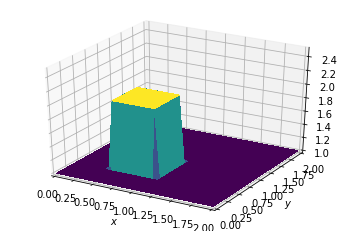

In [4]:
fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [5]:
###Create a function that we can run through various nt timesteps
def diffuse(nt):
    #create the u array and initialize it.
    u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        ###Use arrays to solv this to speed things up.
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    #include the plotting in the function.
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    ###Not sure why we assign this to surface.  maybe used in another step?
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

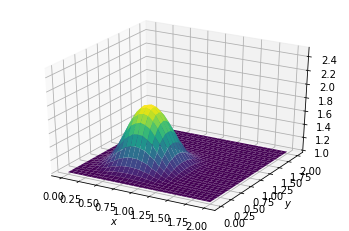

In [6]:
#run our function with time = 10.
diffuse(10)

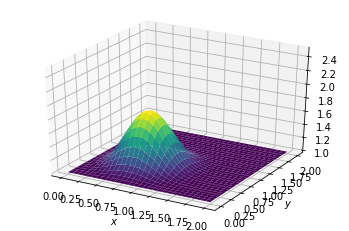

In [7]:
#run our function with time = 14.
diffuse(14)

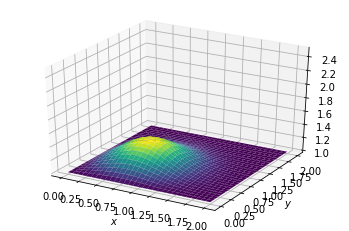

In [8]:
#run our function with time = 50.
diffuse(50)

<strong>Learn More</strong>
<p>The video lesson that walks you through the details of step 5 to 8 is <strong>Video Lesson 6</strong> on YouTube.</p>

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

(The cell above executes the style for this work book.)